# Bayesian Inference Tutorial

In this tutorial we'll cover:

    1) Probability Distributions.
    2) The sum and product rules of probability theory.
    3) The interpretation of likelihoods, posteriors and priors.
    4) An analytic implementation of simple Bayesian inference.
    5) Hierarchical Bayesian models.
    6) Probabilistic graphical models.
    7) A numerical implementation of a hierarchical Bayesian model.

# Probability Distributions

Joint, marginal and conditional probability distributions.

A probability is the chance of a certain event x occurring. The frequentist way to measure a probability is to ask how many times event x occurred out of a number of trials. The probability is then the number of times the outcome was x divided by the number of trials.

For discrete variables this is simple: e.g. to calculate the probability of a coin landing heads-up you would divide the number of time you got heads by the total number of coin tosses.

But once you start to consider continuous variables: e.g. what is the probability that a person weighs between 170 and 173cm, you start having to perform integrals.

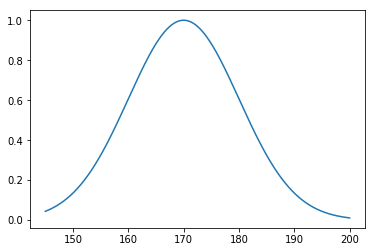

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.linspace(145, 200, 10000)
plt.plot(xs, np.exp(-.5 * (170 - xs)**2/10**2)/)

# Joint probabilities

A joint probability distribution is the probability of more than one thing. For example, your friend goes out to buy breakfast items, X and Y. You forgot to mention to them that you really want bagels. If the probability of your friend buying bagels is P(X = bagels) and the probability of them buying cream cheese is P(Y = cream cheese), then the joint probability of your friend buying both bagels and cream cheese is P(X = bagels, Y = cream cheese). 

# Marginal probabilities 

Marginal probabilities are the probabilities we talk about most often. It's the probability of a single outcome where you ignore other outcomes that might be related. For example, you might say "what's the chance of rain today?". You want the marginal probability that it rains since. If you just want the probability that it rains that day, Siri might tell you "there is a 40% chance of rain today". She has got that information from a weather prediction algorithm that has inferred the probability distribution of rain, marginalizing over the probability distributions of clouds, wind, temperature, and more.

Back to the bagel example. Really you just want the bagels because you love cream cheese. To be honest, you'd probably eat cream cheese on anything. What you really care about is whether your friend brings you cream cheese and you're not interested in the bagels. Sure, you're more likely to get cream cheese if X=bagels but there's a small chance you'll get it anyway. After all, perhaps X will be smoked salmon. Cream cheese and Salmon? Classic combo. 

The probability that your friend brings back cream cheese, regardless of whether they bring back bagels is the probability P(Y = cream cheese), marginalized over the probability distribution over possible X values. If you want to know the total probability of cream cheese being part of your near future you need to add the probability of cream cheese if X=bagels and the probability if X!=equal bagels.

# Conditional probabilities

Perhaps just as your friend was leaving you remembered to shout out, "bagels! Get bagels!". Now you want the conditional probability of X=cream cheese, given that Y=bagels. There's still a chance your friend will get peanut butter or hummus instead of cream cheese. It would be CRAZY but it's possible.

You want to know the probability X=cream cheese given Y=bagels, 

$$P(X=\mathrm{cream~cheese~}|~Y=\mathrm{bagels})$$

This conditional probability is equivalent to the joint probability of X=cream cheese AND Y=bagels, the probability that your friend brings cream cheese AND bagels, divided by the probability that they bring bagels, P(Y=bagels).

$$P(X=\mathrm{cream~cheese~}|~Y=\mathrm{bagels}) = \frac{P(X=\mathrm{cream~cheese}, Y=\mathrm{bagels})}{P(Y=\mathrm{bagels})}$$

You know the probability of friend bringing bagels is high, because you yelled bagels at them. Let's say the denominator is 0.9. The probability of bagels AND cream cheese, the numerator, MUST be lower than this because, like I said, there's always a chance your friend is a crazy person. It had better or lower or equal too because probabilities are always less than or equal to 1. But HOW much lower is the numerator than the denominator? If it's a lot lower, say 0.2, and the ratio is small then you know that the probability that X=cream cheese is low, given Y=bagels. 

The probability $P(X=\mathrm{cream~cheese~}|~Y=\mathrm{bagels}) = \frac{0.2}{0.9} = 0.22$. 

If it's not that much lower, 0.8 say, then you know that the probability that X=cream cheese is high given that Y=bagels.

$P(X=\mathrm{cream~cheese~}|~Y=\mathrm{bagels}) = \frac{0.8}{0.9} = 0.89$.

The above equation can just simply be written,

$P(X|Y) = \frac{P(X, Y)}{P(Y)}$,

without specifying the values, cream cheese and bagel, that the random variables X and Y take. Now these probabilities are distributions over the range of all possible grocery items.

The above equation known as the product rule.

# Bayes rule

Frequentists see probabilities as the outcomes of repeated trials, where the probability of an outcome is its frequency divided by the total number of trials. The more trials, the closer this probability gets to the true probability. In Bayesian statistics, prior beliefs about the probability of an event are incorporated into the calculation. 

Bayes' rule:

$$P(X|Y) = \frac{P(Y|X)P(X)}{P(Y)}$$

can be derived from the product rule of probability theory. Try to derive this equation now. Hint: the joint probability of X and Y, P(X, Y) is the same as the joint probability of Y and X, P(Y, X).

Bayes' rule is more commonly written with probability distributions over data, D and model parameters, $\theta$:

$$P(\theta|D) = \frac{P(D|\theta)~P(\theta)}{P(D)}$$

Each of these terms have a name.

$P(\theta|D)$ is the posterior probability distribution. It's the probability distribution of the model parameters, given the data you observe.

$P(D|\theta)$ is the likelihood. It's the probability of the data you observe, given the model parameters.

$P(\theta)$ is the prior probability distribution. It's your prior belief about the probability distribution over model parameters.

$P(D)$ is the probability distribution over the data. It's the probability that you observed that data set. It's also sometimes called the evidence or the fully marginalized likelihood.